In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [17]:
img1 = cv2.imread('desk_left.jpeg',0) #queryimage # left image
img2 = cv2.imread('desk_right.jpeg',0) #trainimage # right image
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1,des2,k=2)
good = []

pts1 = []
pts2 = []
# ratio test as per Lowe's paper

for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

In [18]:
pts1 = np.int32(pts1)
pts2 = np.int32(pts2)
print(pts1)
print(pts2)

[[  5 272]
 [  8 276]
 [ 21 148]
 [ 21 148]
 [ 21 148]
 [ 21 148]
 [ 27 246]
 [ 32 353]
 [ 59 548]
 [ 59 265]
 [ 67 282]
 [ 71 573]
 [ 73 466]
 [ 87 488]
 [ 98 308]
 [128 354]
 [134 466]
 [140 461]
 [147 326]
 [169 318]
 [186 718]
 [187 600]
 [189 447]
 [229 325]
 [231 599]
 [279 495]
 [287 308]
 [295 662]
 [295 662]
 [313 289]
 [343 550]
 [443 735]
 [448 545]
 [448 545]
 [448 392]
 [453 532]
 [456 318]
 [478 520]
 [484 547]
 [526 368]
 [542 469]
 [544 473]
 [552 466]
 [552 466]
 [576 321]
 [580 497]
 [581 521]
 [600 429]
 [610 493]
 [610 300]
 [614 323]
 [626 388]
 [627 324]
 [630 467]
 [639 601]
 [641 453]
 [668 442]
 [676 572]
 [677 346]
 [677 660]
 [735 279]
 [759 502]
 [759 506]
 [779 226]
 [779 381]
 [789 393]
 [802 280]
 [829 502]
 [838 294]
 [845 537]
 [857 464]
 [861 282]
 [868 423]
 [904 337]
 [905 451]
 [921 468]
 [921 447]
 [926 470]
 [930 469]
 [971 521]
 [993 164]
 [997 153]]
[[156 191]
 [159 194]
 [  6 331]
 [  6 331]
 [  6 331]
 [  6 331]
 [252 194]
 [ 64 687]
 [181 375

In [19]:
F, mask = cv2.findFundamentalMat(pts1,pts2,cv2.FM_LMEDS)
print(F)
print(mask)

[[ 2.02869864e-06  2.74516910e-06 -3.58411281e-03]
 [-4.72730336e-06  1.47786953e-06  5.52964205e-03]
 [ 8.01609024e-04 -5.65737545e-03  1.00000000e+00]]
[[1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]]


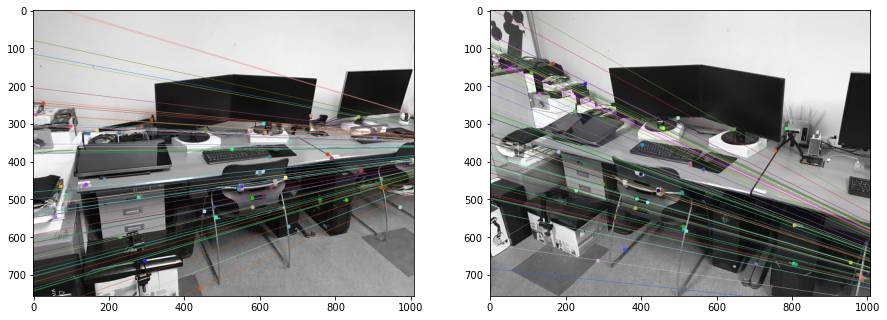

In [20]:
pts1 = pts1[mask.ravel()==1]
pts2 = pts2[mask.ravel()==1]
                    
def drawlines(img1,img2,lines,pts1,pts2):
    r,c = img1.shape
    img1 = cv2.cvtColor(img1,cv2.COLOR_GRAY2BGR)
    img2 = cv2.cvtColor(img2,cv2.COLOR_GRAY2BGR)
    for r,pt1,pt2 in zip(lines,pts1,pts2):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -r[2]/r[1] ])
        x1,y1 = map(int, [c, -(r[2]+r[0]*c)/r[1] ])
        img1 = cv2.line(img1, (x0,y0), (x1,y1), color,1)
        img1 = cv2.circle(img1,tuple(pt1),5,color,-1)
        img2 = cv2.circle(img2,tuple(pt2),5,color,-1)
    return img1,img2
                    
# Find epilines corresponding to points in right image (second image) and
# drawing its lines on left image
lines1 = cv2.computeCorrespondEpilines(pts2.reshape(-1,1,2), 2,F)
lines1 = lines1.reshape(-1,3)
img5,img6 = drawlines(img1,img2,lines1,pts1,pts2)
# Find epilines corresponding to points in left image (first image) and
# drawing its lines on right image
lines2 = cv2.computeCorrespondEpilines(pts1.reshape(-1,1,2), 1,F)
lines2 = lines2.reshape(-1,3)
img3,img4 = drawlines(img2,img1,lines2,pts2,pts1)

plt.figure(figsize=(15,10))
plt.subplot(121),plt.imshow(img5)
plt.subplot(122),plt.imshow(img3)
plt.show()